In [9]:
import librosa
import librosa.display

In [2]:
import os

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'conv.ipynb',
 'DataGen.ipynb',
 'Discriminator.ipynb',
 'f2btrop6.0.wav',
 'Generator.ipynb',
 'hparams.ipynb',
 'MFCC.ipynb',
 'STT.ipynb',
 'syncnet.ipynb',
 'Untitled.ipynb',
 'wav2lip.ipynb']

In [20]:
data,sampling_rate=librosa.load('f2btrop6.0.wav')
sampling_rate

22050

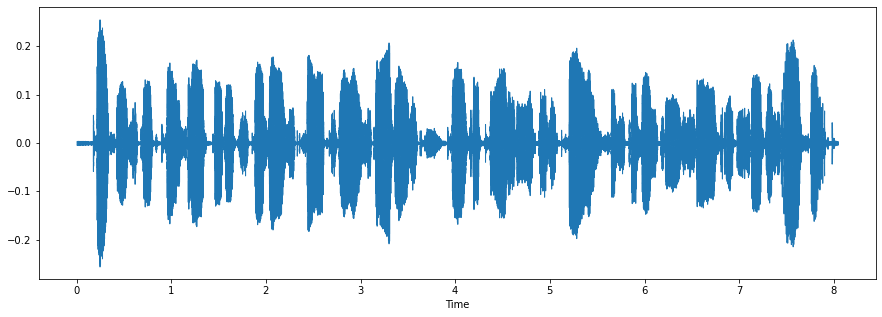

In [13]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import librosa
import glob 
from matplotlib.pyplot import specgram

plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [14]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys

In [15]:
sr,x = scipy.io.wavfile.read('f2btrop6.0.wav')

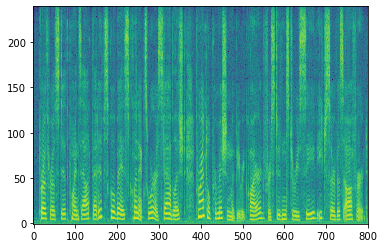

In [17]:
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin
window = np.hamming(nwin)
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [21]:
X, sample_rate = librosa.load('f2btrop6.0.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)

In [25]:
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate, n_mfcc=13),axis=0)

In [29]:
mfccs.size

216

In [30]:
def wav2melspec_db(wav, sr, n_fft, win_length, hop_length, n_mels, max_db=None, min_db=None,
                   time_first=True, **kwargs):
    mel_spec = wav2melspec(wav, sr, n_fft, win_length, hop_length, n_mels, time_first=False, **kwargs)
    mel_db = librosa.amplitude_to_db(mel_spec)
    mel_db = normalize_db(mel_db, max_db, min_db) if max_db and min_db else mel_db

    # Time-axis first
    if time_first:
        mel_db = mel_db.T  # (t, n_mels)

    return mel_db 

In [31]:
librosa.amplitude_to_db(mfccs)


array([19.713766, 21.173035, 23.875507, 23.624577, 23.51264 , 25.354937,
       26.846485, 26.809328, 27.615364, 27.546005, 27.679537, 28.229385,
       27.975195, 28.112705, 28.19152 , 27.322533, 25.23405 , 24.210464,
       24.760212, 24.439335, 24.396683, 24.993668, 24.72044 , 24.180403,
       24.411308, 24.639587, 25.695417, 28.087456, 27.69676 , 24.9508  ,
       25.169306, 28.142282, 28.976406, 28.346104, 27.244476, 26.927872,
       26.141348, 23.890198, 21.015255, 20.715725, 21.648512, 22.369547,
       21.668043, 21.670382, 22.223845, 23.358324, 23.97043 , 24.291916,
       23.527302, 23.238571, 22.625359, 20.796524, 21.953136, 25.418451,
       26.35576 , 26.979115, 27.54526 , 24.6037  , 22.970552, 23.006804,
       23.654053, 22.987663, 22.949776, 21.960747, 22.273804, 22.525652,
       22.805534, 23.205757, 23.674524, 23.532444, 23.349144, 23.811249,
       23.747492, 24.52674 , 25.443441, 27.105602, 27.927105, 28.202961,
       28.669577, 29.264505, 27.471798, 26.334644, 